# Making business decision based on data

#### Project description
*  For the analytical department of a big online store, a list of hypotheses was compiled that may help boost the revenue.
   There is a need to:
   * prioritize these hypotheses
   * launch an A/B test
   * analyze the results
   * We have:
        * hypotheses_us.csv - contains nine hypotheses on boosting an online store revenue
        * orders_us.csv: data on visits, orders, dates, and revenues, categorize by A/B group
        * visits_us.csv: data on visits and dates, categorize by A/B group
        
   

#### Table of contents: 

* [Description of the data: ](#Description-of-the-data)

* [Load the libraries and the data:](#Load-the-libraries-and--the-data:)

* [Preprocessing the data](#Preprocessing-the-data:)

* [Part 1. Prioritizing Hypotheses:](#Part-1.-Prioritizing-Hypotheses:)

* [Part 2. A/B Test Analysis:](#Part-2.-A/B-Test-Analysis:)

   * a.[plot cumulative revenue graph by day and A/B test group:](#plot-cumulative-revenue-graph-by-day-and-A/B-test-group:)
   
   * b.[plot the cumulative average order size for group A compared with group B:](#plot-the-cumulative-average-order-size-for-group-A-compared-with-group-B:)
   
   * c.[plot a relative difference graph for average purchase size:](#plot-a-relative-difference-graph-for-average-purchase-size:)
   
   * d.[caculate each group converstion rate:](#caculate-each-group-converstion-rate:)
   
   * e.[plot a scatter chart of number of orders per user:](#plot-a-scatter-chart-of-number-of-orders-per-user:)
   
   * f.[calculate the 95th and 99th percentiles for number of orders per user:](#calculate-the-95th-and-99th-percentiles-for-number-of-orders-per-user:)
   * g.[calculate the 95th and 99th percentiles for order price:](#calculate-the-95th-and-99th-percentiles-for-order-price:)

   * h. [find the statistical significance of the difference in converstion rate between groups using raw data:](#find-the-statistical-significance-of-the-difference-in-converstion-between-groups-using-raw-data:)

   * I. [find the statistical significance of the difference in avg order size between groups using raw data:](#find-the-statistical-significance-of-the-difference-in-avg-order-size-between-groups-using-raw-data:)
   
   * j.[find the statistical significance of the difference in converstion rate between groups using clean data:](#find-the-statistical-significance-of-the-difference-in-converstion-between-groups-using-new-data:)
   
   * k.[find the statistical significance of the difference in avg order size between groups using clean data:](#find-the-statistical-significance-of-the-difference-in-avg-order-size-between-groups-using-new-data:)

* [Part 3. Conclution:](#conclution:)

##### Description of the data

* hypotheses_us.csv as hypo:
    * Hypotheses — brief descriptions of the hypotheses
    * Reach — user reach, on a scale of one to ten
    * Impact — impact on users, on a scale of one to ten
    * Confidence — confidence in the hypothesis, on a scale of one to ten
    * Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.


* orders_us.csv as orders: 
    * transactionId — order identifier
    * visitorId — identifier of the user who placed the order
    * date — of the order
    * revenue — from the order
    * group — the A/B test group that the user belongs to
    


* visits_us.csv as visits:
    * date — date
    * group — A/B test group
    * visits — the number of visits on the date specified in the A/B test group specified

#### Load the libraries and  the data:

In [71]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats as st
from pandas_profiling import ProfileReport

In [72]:
# Load hypotheses_us.csv:
try:
    hypo = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
except:
     hypo = pd.read_csv('hypotheses_us.csv', sep=';')


In [73]:
pd.set_option('display.max_colwidth', None)
hypo

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [74]:
# Load 'orders_us.csv' data:
try:
    orders = pd.read_csv('/datasets/orders_us.csv')
except:
     orders = pd.read_csv('orders_us.csv')

# orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
    
orders.info()
orders.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B


In [75]:
# Load 'visits_us.csv' data:
try:
    visits = pd.read_csv('/datasets/visits_us.csv')
except:
     visits = pd.read_csv('visits_us.csv')


# visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))        
visits.info()
visits.head(4)       


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717


#### Preprocessing the data:

In [76]:
hypo

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


* hypo table does not contain any duplicate or missing values. It shows the 9 different hypotheses and their rating. 

In [77]:
# using profile report to see if ther's any duplicate, zero's and what are the unique values:
# profile_orders = ProfileReport(orders)
# display(profile_orders)

* orders table contains 1197 rows with no duplicates or missing values
    * 1197 distinct orders id's
    * 1031 distinct visitors id's
    * 31 distinct dates from 01/08/2019 - 31/08/2019
    * 403 distinct revenues-
        * minimum revenue: 5
        * mean revenue: 131.5 
        * maximum revenue: 19,920
    * 640 orders belong to group B 
    * 557 orders belong to group A 
    

In [78]:
# profile_visits = ProfileReport(visits)
# display(profile_visits)

* visits table contains 62 rows with no duplicates or missing values
    * 31 distinct dates 11/08/2019 - 31/08/2019
    * 31 visits belong to group A
    * 31 visits belong to group B
    * 58 distinct visits- 
        * Minimum number of visits: 361
        * mean number of visits: 607.3
        * Maximum number of visits 770

In [79]:
# check if visitors have gotten into both groups, A and B:
tmp = orders.groupby('visitorId').agg({'group':'nunique'}).reset_index()
AB_users = tmp.query('group > 1')['visitorId']

In [80]:
orders.groupby('group')['visitorId'].nunique()

group
A    503
B    586
Name: visitorId, dtype: int64

In [81]:
orders[['transactionId', 'date', 'revenue']].duplicated().sum()

0

##### Summary: 
On orders table there are:
* 503 unique users in group A
* 586 unique users in group B 
* 58 unique users have gotten into both group
    * There are 92 orders that gotten into group B and their visitorId showes up in group A
    * There are 89 orders that gotten into group A and their visitorId showes up in group B
**Those rows are not duplicated*
    
* I don't know what to do with the 58 visitorId that belong to group A and B, Im going to create a new df without those 58 visitorId.

In [82]:
orders_old = orders.copy()
orders = orders_old.query('visitorId not in @AB_users')
orders.describe()

,transactionId,visitorId,revenue
count,1.016000e+03,1.016000e+03,1016.000000
mean,2.155085e+09,2.128677e+09,130.770866
std,1.234372e+09,1.221578e+09,648.079810
min,1.062393e+06,5.114589e+06,5.000000
25%,1.143481e+09,1.043655e+09,20.775000
50%,2.144499e+09,2.150274e+09,50.100000
75%,3.256513e+09,3.146991e+09,126.950000
max,4.288552e+09,4.283872e+09,19920.400000


#### Part 1. Prioritizing Hypotheses:

In [83]:
hypo.head(1)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6


In [84]:
# Apply the ICE framework to priorotize hypotheses:
hypo['ICE'] = (hypo['Impact']* hypo['Confidence'])/hypo['Effort']

ice = hypo.sort_values('ICE', ascending= False)

In [85]:
# Apply the RICE framework to priorotize hypotheses:
hypo['RICE'] = (hypo['Reach']*hypo['Impact']* hypo['Confidence'])/hypo['Effort']

rice = hypo.sort_values('RICE', ascending= False)

In [86]:
ice.head(5)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000


In [87]:
rice.head(5)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2


In [88]:
print("Hypotheses number 7, has the higher RICE score: ")
print(rice.loc[0,'Hypothesis'])
print()
print("Hypotheses number 8, has the higher ICE score: ")
print(ice.loc[0,'Hypothesis'])

Hypotheses number 7, has the higher RICE score: 
Add two new channels for attracting traffic. This will bring 30% more users

Hypotheses number 8, has the higher ICE score: 
Add two new channels for attracting traffic. This will bring 30% more users


* By the ICE framework hypotheses number 8 lead and hypotheses number 7 in the 3 place. 
* ICE takes into account:
    * The Impact the change will do, 
    * The Confidence in the assumption,
    * and the Effort, the cost of testing this hypothesis.
* RICE = ICE * Reach,
    * Reach: how many users will be affected by the update
* Once Reach has been taken into consideration hypotheses number 7 takes the lead, 
    apparently, hypotheses number 8 has a Reach value of 1, 
    while hypothesis number 7 has a Reach value of 10 which means that this update will affect more users.

#### Part 2. A/B Test Analysis:

In [19]:
# building an array with unique paired data - group values:
dates_groups = orders[['date', 'group']].drop_duplicates()
dates_groups.head(2)

,date,group
0,2019-08-15,B
7,2019-08-15,A


In [89]:
# find max date, representation of the group, number of unique orders, and userID . 
# Calculate the sum of avg purchase size-getting cumulative daily data on orders:
orders_agg = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                orders['group'] == x['group'])].agg({'date': 'max',
                                                                                                     'group': 'max', 
                                                                                                     'transactionId': pd.Series.nunique, 
                                                                                                     'visitorId': pd.Series.nunique,
                                                                                                     'revenue': 'sum'}), axis=1).sort_values(by = ['date','group'])
orders_agg.head(3)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9


In [90]:
# find max date, representation of the group, and sum of visits- getting cumulative daily data on visits:
visits_agg = dates_groups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], 
                                                                visits['group'] == x['group'])].agg({'date': 'max',
                                                                                                     'group': 'max',
                                                                                                    'visits': 'sum'}), axis=1).sort_values(by = ['date','group'])
visits_agg.head(3)

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338


In [91]:
# merge tables visits_agg and orders_agg:
cumu_data = orders_agg.merge(visits_agg, left_on = ['date', 'group'], right_on = ['date', 'group'])
cumu_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']
cumu_data.head(10)

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845
5,2019-08-03,B,54,53,4606.9,1803
6,2019-08-04,A,77,71,6225.6,2562
7,2019-08-04,B,68,66,6138.5,2573
8,2019-08-05,A,99,92,7623.6,3318
9,2019-08-05,B,89,87,7587.8,3280


##### plot cumulative revenue graph by day and A/B test group:

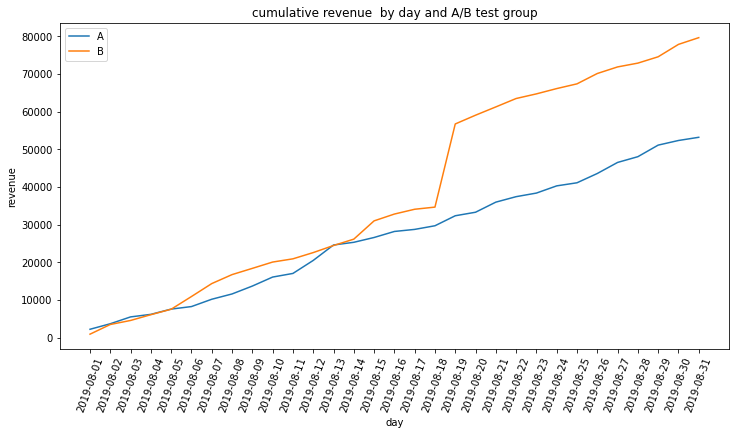

In [92]:
cumuA = cumu_data.query('group == "A"')[['date', 'revenue', 'orders']]
cumuB = cumu_data.query('group == "B"')[['date', 'revenue', 'orders']]
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(cumuA['date'], cumuA['revenue'], label ='A')
plt.plot(cumuB['date'], cumuB['revenue'], label ='B')
plt.title('cumulative revenue  by day and A/B test group')
plt.xlabel('day')
plt.ylabel('revenue')
plt.xticks(cumuA['date'].astype('string'), rotation =70 )
plt.legend()
plt.show()

Revenue is rising in both groups and it's a good sign.
Group A has almost linear line that rises steadily. 
Group B revenue starts below group A and after 04/08 its rises above group A.  
On 19/08  group B  has big pike. 
It may imply either a surge in the number of orders or the presence of very expensive orders in the sample. 

##### plot the cumulative average order size for group A compared with group B:

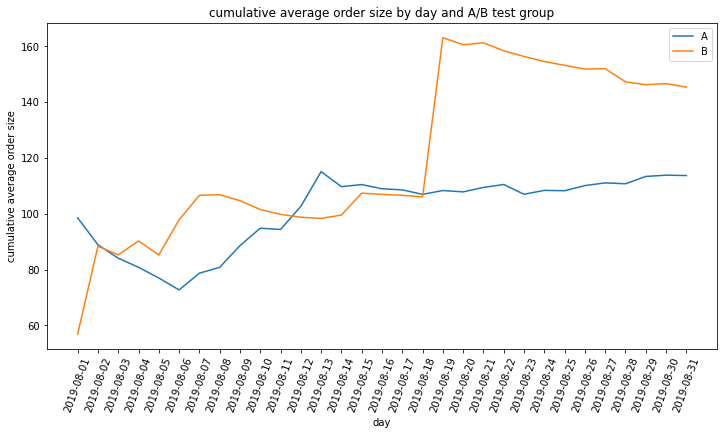

In [93]:
%matplotlib inline
plt.figure(figsize=(12,6))

plt.plot(cumuA['date'], cumuA['revenue']/cumuA['orders'], label ='A')
plt.plot(cumuB['date'], cumuB['revenue']/cumuB['orders'], label ='B')
plt.title('cumulative average order size by day and A/B test group')
plt.xlabel('day' )
plt.ylabel('cumulative average order size')
plt.xticks(cumuA['date'].astype('string'), rotation =70 )
plt.legend()
plt.show()

* Group B is unstable. The average order size keeps changing, it has big spikes on 02/08 and 19/08, and it starts falling toward the end. 
* Group A unstable as well but less dramatically. It starts at 100 and drops to 70 on 06/08, and then its rises to 120  pike on 13/08. 
* Group A stays around the same average order size all the way to the end. 

In [36]:
# gethering the data: 
merge_cumu = cumuA.merge(cumuB, left_on='date', right_on='date', how = 'left', suffixes=['A', 'B'])
merge_cumu['avg_order_sizeA'] = merge_cumu['revenueA']/merge_cumu['ordersA']
merge_cumu['avg_order_sizeB'] = merge_cumu['revenueB']/merge_cumu['ordersB']
merge_cumu.head()

,date,revenueA,ordersA,revenueB,ordersB,avg_order_sizeA,avg_order_sizeB
0,2019-08-01,2266.6,23,967.2,17,98.547826,56.894118
1,2019-08-02,3734.9,42,3535.3,40,88.926190,88.382500
2,2019-08-03,5550.1,66,4606.9,54,84.092424,85.312963
3,2019-08-04,6225.6,77,6138.5,68,80.851948,90.272059
4,2019-08-05,7623.6,99,7587.8,89,77.006061,85.256180


##### plot a relative difference graph for average purchase size:

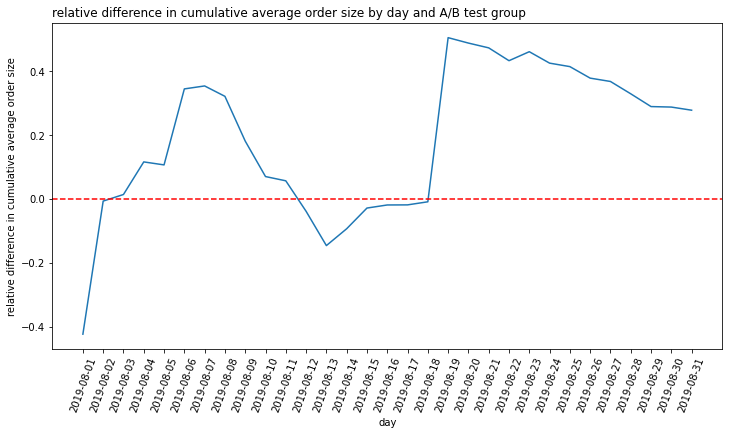

In [37]:
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(merge_cumu['date'], (merge_cumu['avg_order_sizeB']/merge_cumu['avg_order_sizeA'])-1)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('relative difference in cumulative average order size by day and A/B test group', loc='left')
plt.xlabel('day' )
plt.ylabel('relative difference in cumulative average order size')
plt.xticks(cumuA['date'].astype('string'), rotation =70 )
plt.show()

By this graph and the other two obove, its reasonble to think that there are outliets. 
Here we can see: 
until 02/08 group A was leading with cumulative average order size, 
then group B starts to lead until 12/08 with big pike (40%).
From 12/08-18/08 group A lead again but the change is milder (10%).
From 18/08 until the end group B lead againe with more the 40% differents.

In [39]:
cumu_data.head(2)

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713


##### caculate each group converstion rate: 

In [40]:

cumu_data['converstion'] = cumu_data['orders']/cumu_data['visits']
cumuA = cumu_data.query('group == "A"')
cumuB = cumu_data.query('group == "B"')
cumuB.head(2)

,date,group,orders,buyers,revenue,visits,converstion
1,2019-08-01,B,17,17,967.2,713,0.023843
3,2019-08-02,B,40,39,3535.3,1294,0.030912


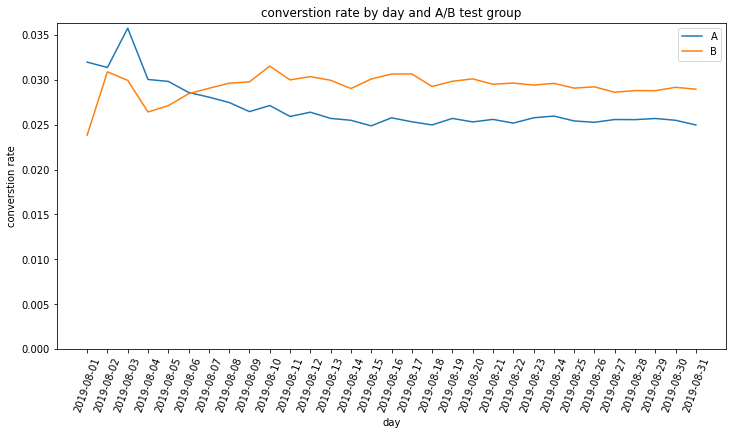

In [41]:
#plot a daily converstion rate for the two groups:
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(cumuA['date'], cumuA['converstion'], label ='A')
plt.plot(cumuB['date'], cumuB['converstion'], label ='B')
plt.title('converstion rate by day and A/B test group')
plt.xlabel('day' )
plt.ylabel('converstion rate')
plt.ylim(ymin = 0)
plt.xticks(cumuA['date'].astype('string'), rotation =70 )
plt.legend()
plt.show()

* Group A:
    * Starts at 0.032 and has a minor drop and then it rises to 0.036 on 03/08 and then drops all the way to 0.024.
    * its stays around this value.
    * on 07/08 A conversion rate started falling behind group B
* Group B:
    * Start at  0.024, rises to 0.031around 03/08, and then drops to 0.027 around 04/08. 
    * on 05/08 the graph star raising moves over graph A and stays around 0.03. 
    * so far Group B has a better conversion rate, its lead on average purchase size and in cumulative revenue, 

##### plot a scatter chart of number of orders per user:

In [42]:
orders.head(2)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B


In [43]:
grp_user= orders.groupby('visitorId').agg({'transactionId': 'nunique',
                                            'group':'max',
                                             'revenue': 'sum'}).reset_index()

grp_user.columns=['visitorId', 'n_orders', 'group', 'sum_revenue']
grp_user.head(2)

,visitorId,n_orders,group,sum_revenue
0,5114589,1,B,10.8
1,6958315,1,B,25.9


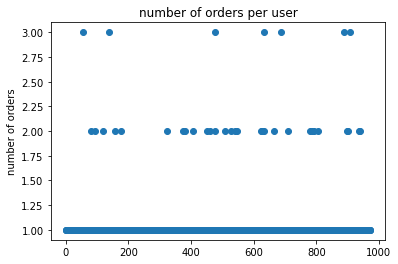

In [44]:
x_value = pd.Series(range(0, len(grp_user['n_orders'])))
plt.scatter(x_value, grp_user['n_orders'])
plt.title('number of orders per user')
plt.xlabel('')
plt.ylabel('number of orders')
plt.show()

The majority of the users made one purchase, some made two, and a few(7) made 3 purchases.

##### calculate the 95th and 99th percentiles for number of orders per user:

In [45]:

np.percentile(grp_user['n_orders'],[95, 99])

array([1., 2.])

* No more than 5% of people who visit the website order more than once.
* No more than 1% of people who visits the website order more than twice.
* I will define the 99th percentile as the top limit which means order per user < 3. 

In [46]:
outliers_visitorId1 = grp_user.query('n_orders > 2')['visitorId']
outliers_visitorId1.head(2)

55     249864742
138    611059232
Name: visitorId, dtype: int64

##### plot a scatter chart of order price:

In [47]:
grp_user['order_price']= grp_user['sum_revenue']/grp_user['n_orders']
grp_user.head(2)

,visitorId,n_orders,group,sum_revenue,order_price
0,5114589,1,B,10.8,10.8
1,6958315,1,B,25.9,25.9


Text(0, 0.5, 'order prices')

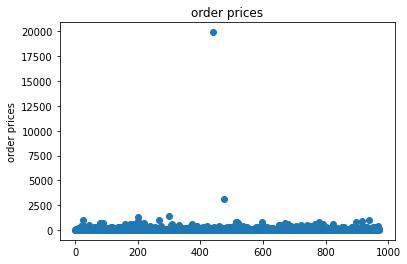

In [48]:
x_value = pd.Series(range(0, len(grp_user['order_price'])))
plt.scatter(x_value, grp_user['order_price'])
plt.title('order prices')
plt.xlabel('')
plt.ylabel('order prices')

In [49]:
grp_user.query('order_price > 2000')

,visitorId,n_orders,group,sum_revenue,order_price
440,1920142716,1,B,19920.4,19920.4
477,2108080724,1,B,3120.1,3120.1


In [50]:
orders.query('revenue > 2000')

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
1196,3936777065,2108080724,2019-08-15,3120.1,B


* By the graph above its clear to see that most of the orders do not cross 2000.
* Ther's two purchases with exception amount of 19,920.4 at 19/08/2019 and 3120 at 15/08/2019. 


##### calculate the 95th and 99th percentiles for order price:

In [51]:
np.percentile(grp_user['order_price'],[95, 99])

array([429.74, 830.3 ])

Text(0, 0.5, 'order prices')

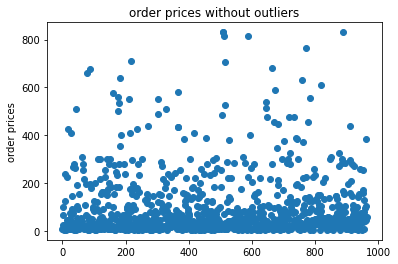

In [52]:
grp_new= grp_user.query('order_price < 831')
x_value = pd.Series(range(0, len(grp_new['order_price'])))
%matplotlib inline
plt.scatter(x_value, grp_new['order_price'])
plt.title('order prices without outliers')
plt.xlabel('')
plt.ylabel('order prices')

* No more than 5% of the people who visit the website spend more than 429.74
* No more than 1% of the people who visit the website spend more than 830.3
* I will define the 99th perecentile as normal which mean order price < 831.
* As we can see by the graph above, setting the bar over 830 order price, show the distribution of order prices in a better way.
* Most of the orders cost less the 200. 

In [53]:
outliers_visitorId2 = grp_user.query('order_price > 830')['visitorId']
outliers_visitorId2.head(2)

25     148427295
200    887908475
Name: visitorId, dtype: int64

In [54]:
# create a list of all visitors I'd that consider as outlier:  
outliers_visitorId= outliers_visitorId1.append(outliers_visitorId2)
outliers_visitorId.head(2)

55     249864742
138    611059232
Name: visitorId, dtype: int64

In [55]:
# create new data set without the outliers: 
orders_new = orders.query('visitorId not in @outliers_visitorId') 
orders_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 1194
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  983 non-null    int64  
 1   visitorId      983 non-null    int64  
 2   date           983 non-null    object 
 3   revenue        983 non-null    float64
 4   group          983 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.1+ KB


#####  find the statistical significance of the difference in conversion between groups using raw data:

In [56]:
# group orders by visitore id, to see how many orders each user has:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg(
                                                    {'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg(
                                                    {'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [57]:
# find out how many users just visit the website, without orders: 
num_visits_no_ordersA= visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])
num_visits_no_ordersB= visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])

In [58]:
# use the findings above to create table with visits an orders: 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(num_visits_no_ordersA), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(num_visits_no_ordersB), name='orders')],axis=0)


* H0: Conversion in group A is equal to Conversion in group B
* H1: Conversion in group A is not equal to Conversion in group B

In [59]:
alpha = 0.05
results1 = st.mannwhitneyu(sampleA, sampleB)
results1.pvalue

0.011018084110014696

* p-value smaller than 0.05 so we reject the null hypotheses, sample A different from sample B
* The conversion rate in group A not equal to the conversion rate in group B 

In [60]:
# calculate the difference between the 2 samples conversion rate:
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.160


* group B conversion rate 16% bigger then group A conversion rate. 

##### Find the statistical significance of the difference in avg order size between groups using raw data:

In [61]:
order_size_A= orders[orders['group']=='A']['revenue']
order_size_B= orders[orders['group']=='B']['revenue']

* H0: average order size in group A is equal to the average order size in group B
* H1: average order size in group A is not to the equal average order size in group B

In [62]:
alpha = 0.05
results2 = st.mannwhitneyu(order_size_A, order_size_B)
results2.pvalue

0.8622329690015668

* p-value greater than 0.05 so we can't reject the null hypotheses 
* We can't say that the avg order size is not equal between the groups 

In [63]:
(order_size_B.mean()/order_size_A.mean())-1

0.2783448769307848

* There is a relative difference of 28% between the group's average orders size, group B  average  order size is 28% greater than group A avg order size

##### find the statistical significance of the difference in conversion between groups using new data:

In [64]:
ordersByUsersA_new = orders_new[orders_new['group']=='A'].groupby('visitorId', as_index=False).agg(
                                                    {'transactionId' : pd.Series.nunique})
ordersByUsersA_new.columns = ['userId', 'orders']

ordersByUsersB_new = orders_new[orders_new['group']=='B'].groupby('visitorId', as_index=False).agg(
                                                    {'transactionId' : pd.Series.nunique})
ordersByUsersB_new.columns = ['userId', 'orders']

num_visits_no_ordersA_new= visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA_new['orders'])
num_visits_no_ordersB_new= visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB_new['orders'])

sampleA_new = pd.concat([ordersByUsersA_new['orders'],pd.Series(0, index=np.arange(num_visits_no_ordersA_new), name='orders')],axis=0)
sampleB_new = pd.concat([ordersByUsersB_new['orders'],pd.Series(0, index=np.arange(num_visits_no_ordersB_new), name='orders')],axis=0)

In [65]:
ordersByUsersA_new.head(2)

,userId,orders
0,11685486,1
1,54447517,1


* H0: Conversion in group A is equal to Conversion in group B
* H1: Conversion in group A is not equal to Conversion in group B

In [66]:
alpha = 0.05
results3 = st.mannwhitneyu(sampleA_new, sampleB_new)
results3.pvalue

0.0062083132347477525

* p-value smaller than 0.05 so we reject the null hypotheses.
* The conversion rate in group A not equal to the conversion rate in group B

In [67]:
(sampleB_new.mean()/sampleA_new.mean())-1

0.1925785654206893

* The relative difference of the conversion is 19.26%, group B conversion rate is 16.15% smaller than group A conversion rate

#####  Find the statistical significance of the difference in avg order size between groups using new data:

In [68]:
order_size_A_new= orders_new[orders_new['group']=='A']['revenue']
order_size_B_new= orders_new[orders_new['group']=='B']['revenue']

* H0: average order size in group A is equal to the average order size in group B
* H1: average order size in group A is not to the equal average order size in group B

In [69]:
alpha = 0.05
results4 = st.mannwhitneyu(order_size_A_new, order_size_B_new)
results4.pvalue

0.8767101122551697

* p-value greater than 0.05 so we can't reject the null hypotheses
* We cannot say that the average order size in group A not equal to the average order size in group B

In [70]:
(order_size_B_new.mean()/order_size_A_new.mean())-1

-0.013861500572296626

* The relative difference of the avg_order_size is -1.4%, group B avg_order_size is 1.4% smller then group A avg_order_size

#### Conclusion: 

* Nor the conversion rate nor the average order size got to the stable stage in the graphs above.
By this factor only I would like to continue the test, its only been running for a month, and I would like to give this test more time. 

* By testing the hypotheses considering the raw data we found:
    * for the conversion P-value of 0.011, so we reject the null hypotheses.
    * There is  a difference of 16% between the group's conversion rate (group B greater)
    * for the average order size  P-value of 0.86, so there is no way to reject the null hypotheses.
    * There is  a difference of 28% between the group's average order size (group B greater)
    
* By testing the hypotheses considering the clean data we found:
    * for the conversion P-value of 0.006, so we reject the null hypotheses.
    * There is  a difference of 19% between the group's conversion rate (group B greater)
    * for the average order size  P-value of 0.87, so there is no way to reject the null hypotheses.
    * There is  a difference of -1.4% between the group's average order size (group B smaller)
    
* The outlier removal has affected the results.

**Coclution:**
* At first, I  thought it better to continue the test, and give it some time maybe the results will stabilize, I would like to have better knowledge about the costs so I could see the whole picture. 
* After going through the hypotheses test, It's been established, the groups are different by conversion rate.
* Group B has better results. 
* Judging by the average order size there are no differences between the groups.
* At the clean(new) data, a difference of 1.4% was discovered between the groups, which I believe is relatively small. 
* I'm suggesting stopping the test, and considering group B as the leader. 
